In [1]:
import warnings

import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline 
warnings.filterwarnings('ignore')

In [3]:
def plot_line_chart(data, xlabel, ylabel, x_lowerlim, x_upperlim, plot_name):
    plt.figure(figsize=(10,10))
    plt.plot(data, 'bx-')
    plt.xlim(x_lowerlim, x_upperlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(plot_name)
    plt.grid(True)
    plt.show()

In [4]:
def optimal_cluster_analysis(X, n_clusters, cluster_labels):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    # 1st plot - silhoutte analysis
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot - showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors)
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

## Section 1: Read the dataset

In [5]:
file_headers = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk', 'Class']
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', names=file_headers)
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


## Section 2: Encode independent features

In [6]:
encoder = LabelEncoder()
for column in file_headers[:-1]:
    df[column] = encoder.fit_transform(df[column])
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,NB
1,1,1,0,0,0,1,NB
2,0,0,0,0,0,0,NB
3,2,2,2,2,2,2,NB
4,1,1,2,2,2,1,NB


## Section 3: Separate the dependant variable from the rest of the train data

In [7]:
X = df.drop(['Class'], axis=1)
y = df['Class']

## Section 4: Split the dataset into training and test data

In [8]:
size = 0.8
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=seed)

## Section 5: Apply PCA on the independent features of train data

In [9]:
X_train_pca = X_train

pca = PCA()
pca.fit(X_train_pca)
pca.explained_variance_ratio_

array([0.31175394, 0.21871383, 0.18202844, 0.10920431, 0.09681064,
       0.08148884])

## Section 6: Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance).

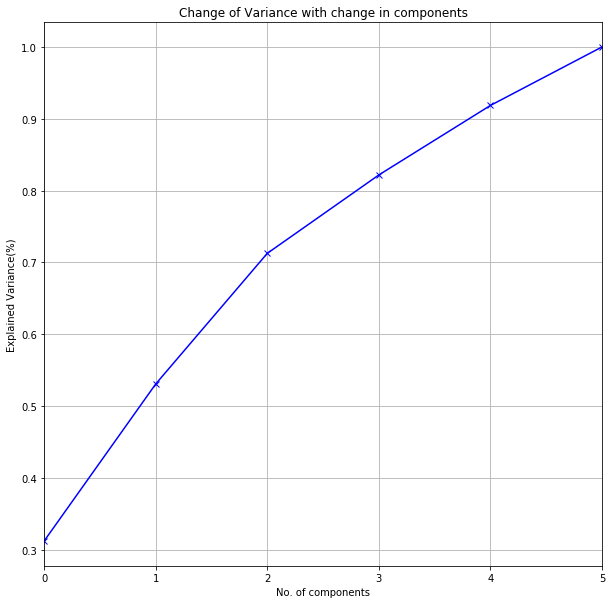

In [10]:
plot_line_chart(np.cumsum(pca.explained_variance_ratio_), 
                'No. of components', 'Explained Variance(%)',
                0, 5,
                'Change of Variance with change in components')

**Observation:**
- From the above plot, we can find that 95% of the variance is covered by 4 components. Hence, we will be taking 4 principal components.

## Section 7: Transform the data using PCA

In [11]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_pca)

## Section 8: Apply KMeans algorithm on the above transformed data.

For n_clusters = 2 The average silhouette_score is : 0.24891865850623965


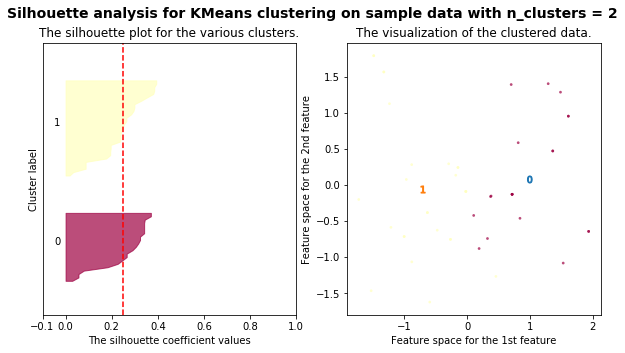

For n_clusters = 3 The average silhouette_score is : 0.27788371163746833


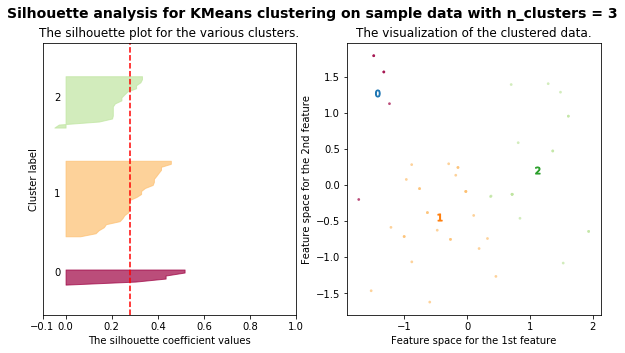

For n_clusters = 4 The average silhouette_score is : 0.28486582783357534


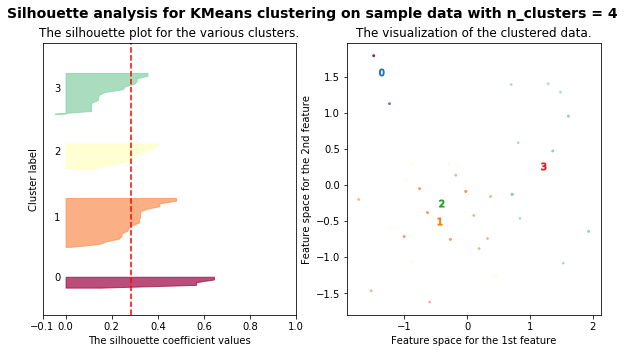

For n_clusters = 5 The average silhouette_score is : 0.26703851965076475


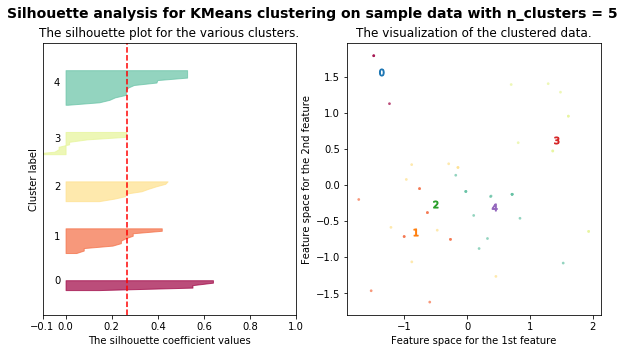

For n_clusters = 6 The average silhouette_score is : 0.3299184766371295


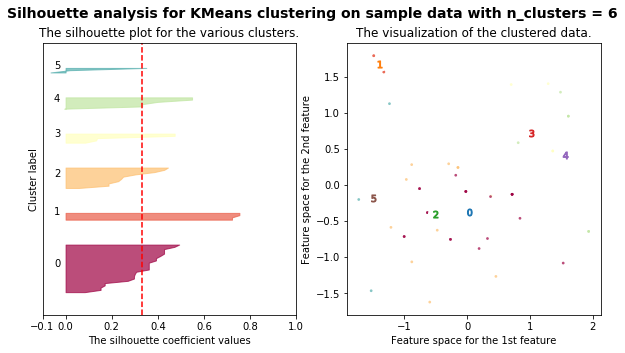

For n_clusters = 7 The average silhouette_score is : 0.34034146916917224


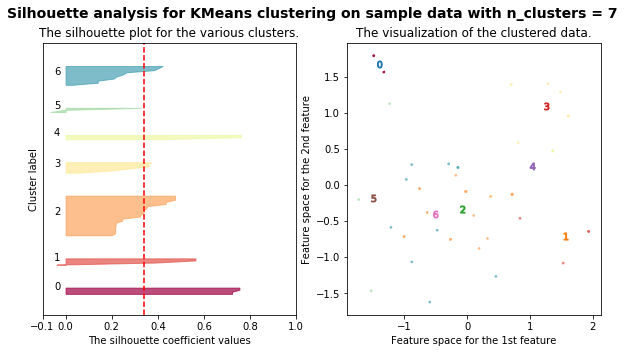

For n_clusters = 8 The average silhouette_score is : 0.38774141552942587


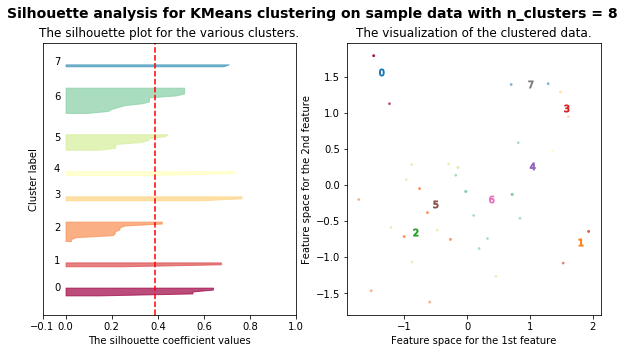

For n_clusters = 9 The average silhouette_score is : 0.40110130319293913


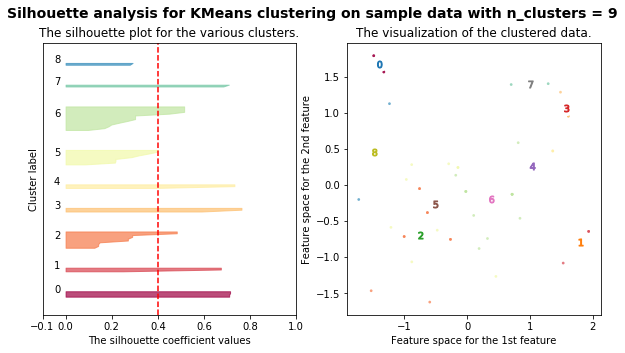

For n_clusters = 10 The average silhouette_score is : 0.3903909807257832


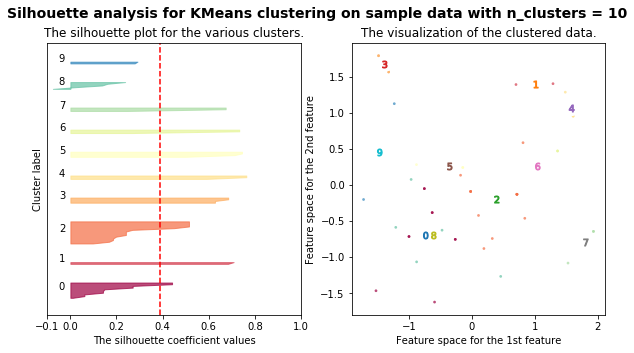

For n_clusters = 11 The average silhouette_score is : 0.3820168706848661


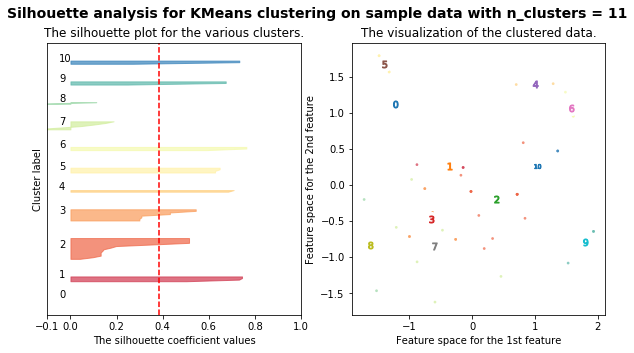

For n_clusters = 12 The average silhouette_score is : 0.39399545903193994


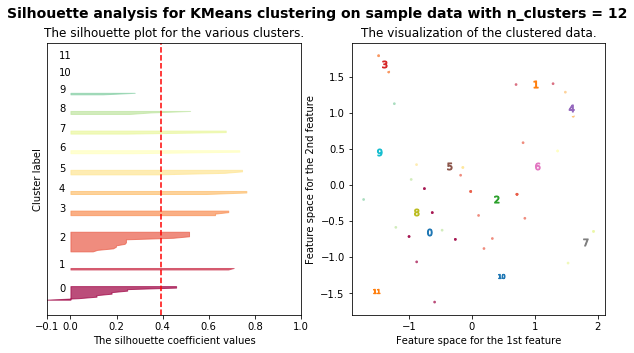

For n_clusters = 13 The average silhouette_score is : 0.38495439267842035


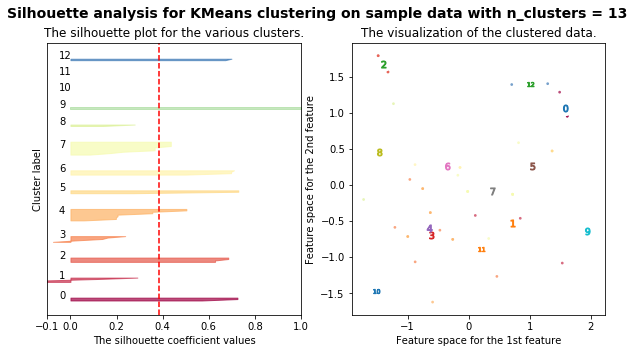

For n_clusters = 14 The average silhouette_score is : 0.3815874742772257


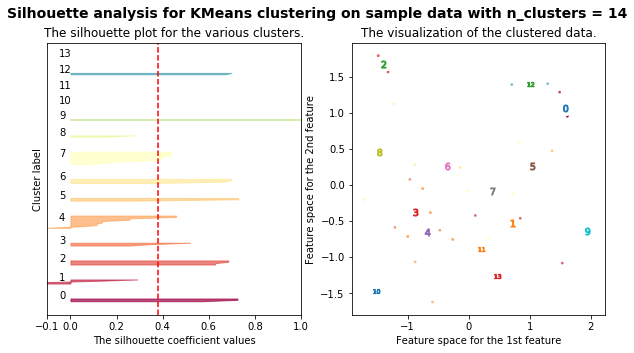

For n_clusters = 15 The average silhouette_score is : 0.3760364978543198


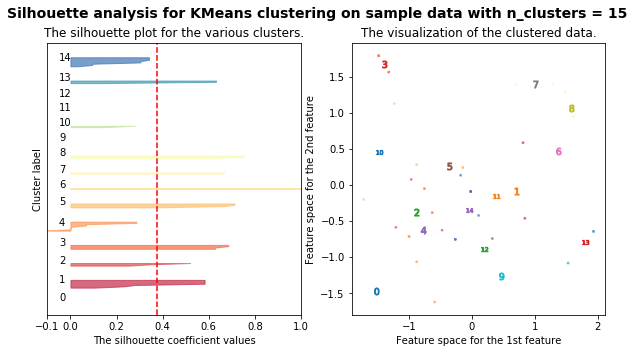

For n_clusters = 16 The average silhouette_score is : 0.39274037267298234


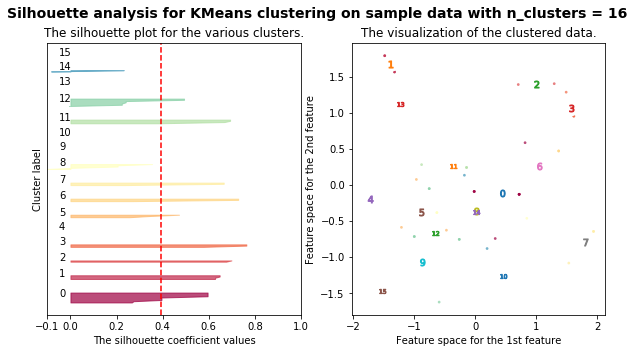

For n_clusters = 17 The average silhouette_score is : 0.40998808900619255


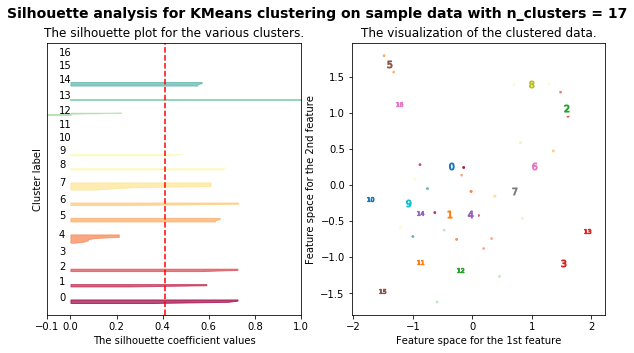

For n_clusters = 18 The average silhouette_score is : 0.4418499620449531


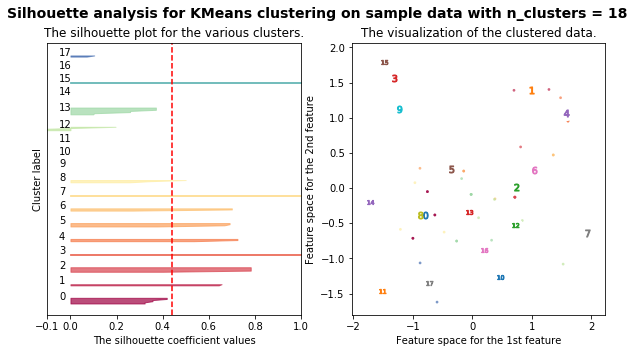

For n_clusters = 19 The average silhouette_score is : 0.43779848874103666


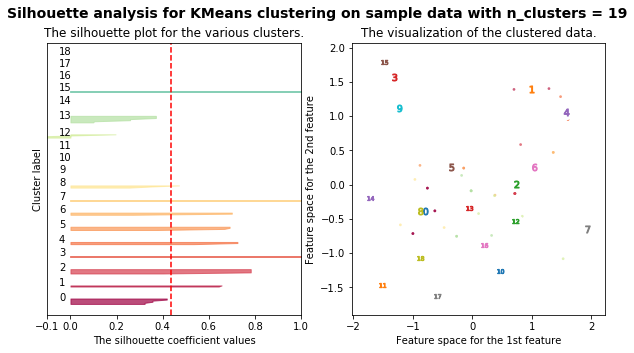

For n_clusters = 20 The average silhouette_score is : 0.46711660979042635


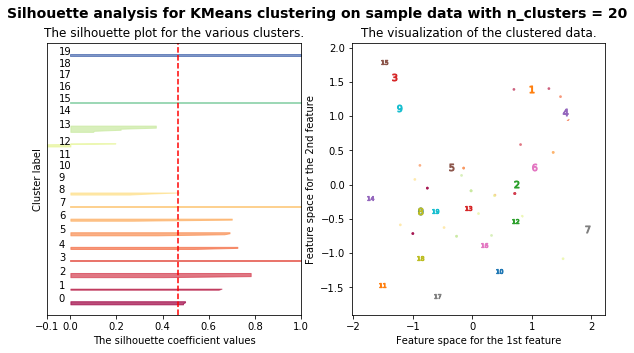

For n_clusters = 21 The average silhouette_score is : 0.47404757446406265


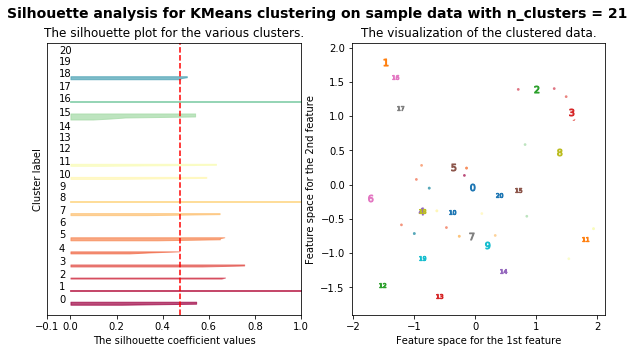

For n_clusters = 22 The average silhouette_score is : 0.4683023361570398


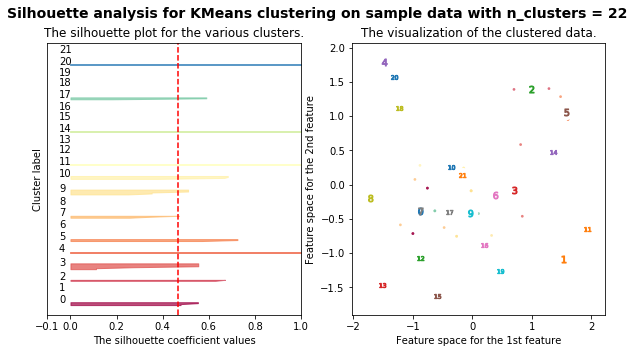

For n_clusters = 23 The average silhouette_score is : 0.5248523926123326


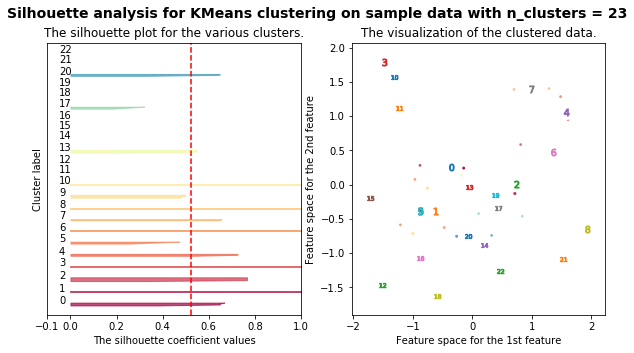

For n_clusters = 24 The average silhouette_score is : 0.5314778297158766


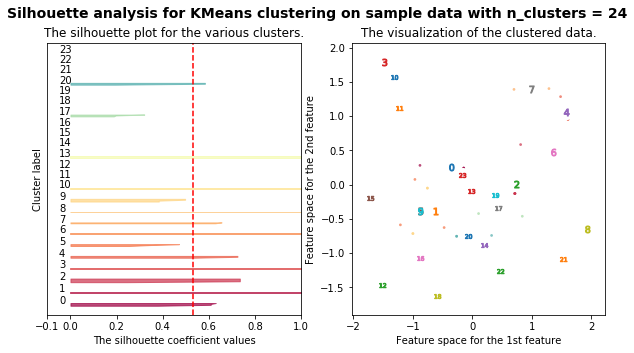

For n_clusters = 25 The average silhouette_score is : 0.573373605894475


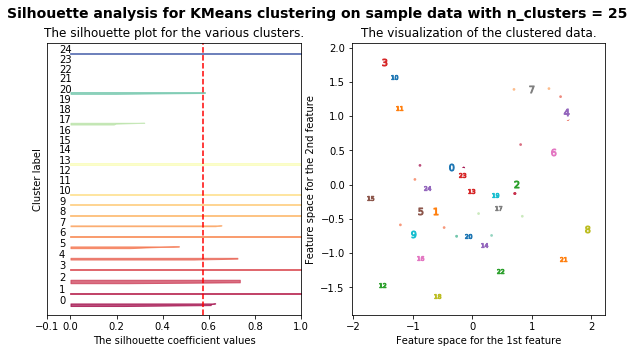

For n_clusters = 26 The average silhouette_score is : 0.578160490990308


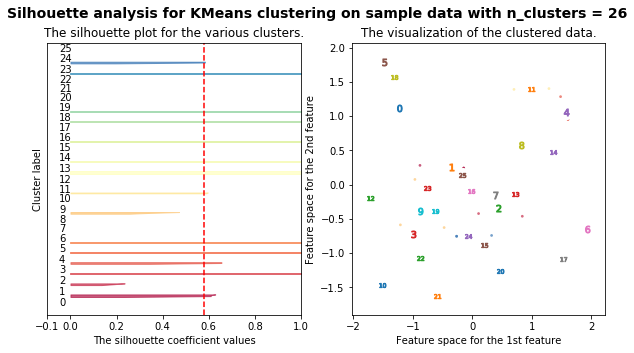

For n_clusters = 27 The average silhouette_score is : 0.5851100182826601


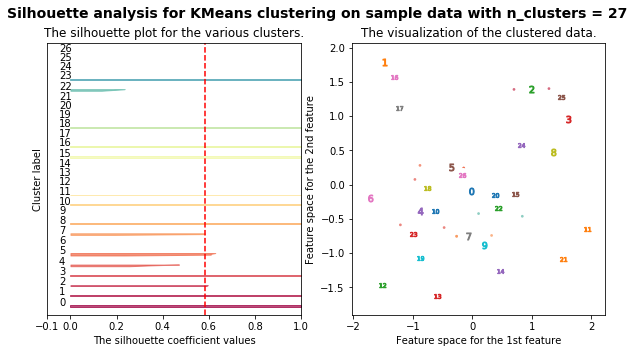

For n_clusters = 28 The average silhouette_score is : 0.5695057713348567


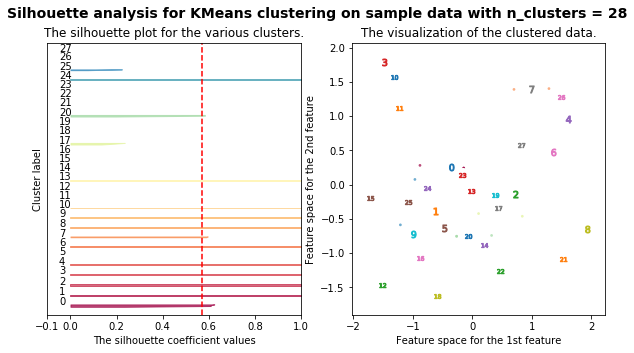

For n_clusters = 29 The average silhouette_score is : 0.568839126676282


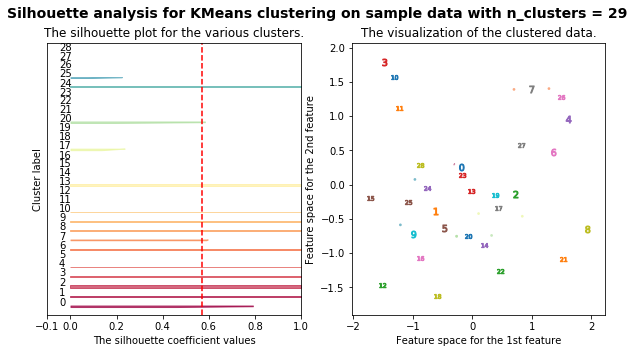

[96.37374891934422, 76.05652691379996, 61.018748204041145, 52.88670374347803, 45.305948405481644, 38.118293911693634, 31.738385741866043, 26.602500652646896, 23.44547865714312, 20.60239199573121, 19.29625664819001, 17.37137813729953, 16.12154588770546, 14.713519223394687, 12.389508241853665, 11.623132912375205, 9.577500580227822, 8.645513662910918, 7.637091720729932, 6.403062836127586, 5.368052078658925, 4.285955528067351, 3.5549384682404757, 3.043511526422942, 2.504659695009427, 1.9252114854257, 1.528948205807937, 1.1588726379991425]


In [12]:
wcss = []
for cluster in range(2,30):
    clusterer = KMeans(n_clusters=cluster,init='k-means++', n_init=10, max_iter=300, random_state=0)
    cluster_labels = clusterer.fit_predict(X_train_pca)
    optimal_cluster_analysis(X_train_pca, cluster, cluster_labels)
    wcss.append(clusterer.inertia_)
    
print(wcss)

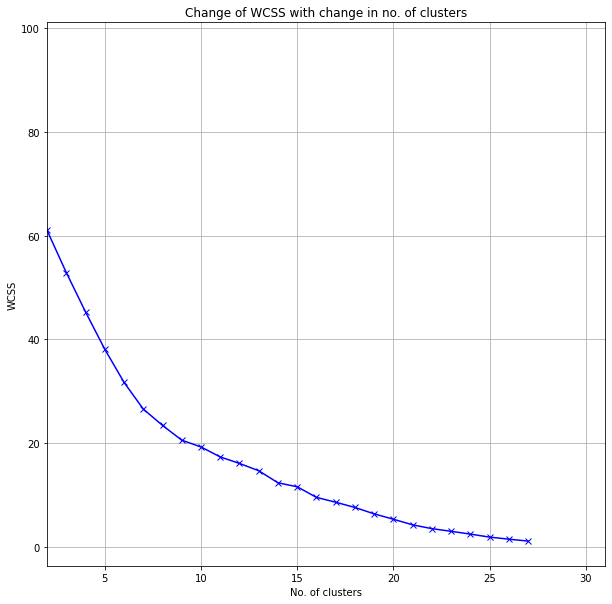

In [13]:
# using the elbow method process to find the optimal number of clusters.
plot_line_chart(wcss, 'No. of clusters', 'WCSS', 2, 31, 'Change of WCSS with change in no. of clusters')

**Observation:**
- From the above avg silhoutte scores and elbow method, we find that 22 and 23 seem to be good values for optimal number of clusters. Hence, we will take k=22.

## Section 9: Select optimal number of clusters and form clusters out of the train data

For n_clusters = 22 The average silhouette_score is : 0.4683023361570398


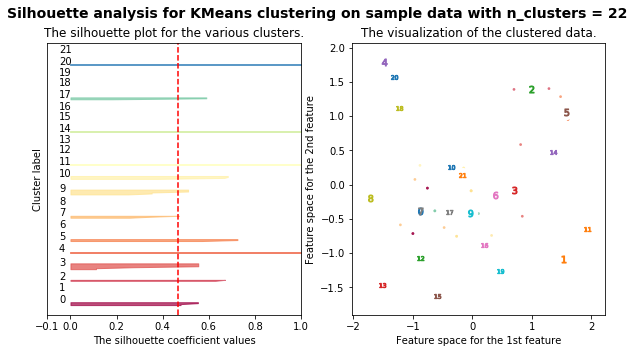

Predicted Clusters (Train Data): 
[ 3 13  3  0  0  5  9  6 17  9  7 10 11  7  3 17 20  9 17  5  9  9 11  4
  2  3  4  0  9 10 18 10  0 12  5 15  3 16  2 19  8 21 14 20 10  1  3 14
  7  3]


In [14]:
cluster = 22
clusterer = KMeans(n_clusters=cluster,init='k-means++', n_init=10, max_iter=300, random_state=0)
cluster_labels = clusterer.fit_predict(X_train_pca)
optimal_cluster_analysis(X_train_pca, cluster, cluster_labels)

print('Predicted Clusters (Train Data): ')
print(cluster_labels)

## Section 10: Create a new column in the train data and populate it with the cluster labels.

In [15]:
X_train['Predicted Cluster'] = list(cluster_labels)
X_train.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Predicted Cluster
205,2,1,1,1,1,1,3
127,0,0,0,2,2,0,13
185,1,1,1,0,1,2,3
221,0,1,1,1,1,1,0
232,0,1,1,1,1,1,0
32,2,1,2,0,0,2,5
167,1,1,1,1,1,0,9
142,1,2,0,0,2,1,6
209,0,0,1,1,1,1,17
147,1,1,1,1,1,1,9
